Let's clean up the data so that later on would be a lot easier to work with it and the operations would make more sense.

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()
%matplotlib inline

# Load data.

In [2]:
# read in the CSV's
calls = pd.read_csv(r'../data/callsforservicefiltered.csv')

C:\Users\81wingo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Filter out rows where cancelled calls field = True, report only field = True.
Eliminate calls that were either cancelled or their type was report only (someone called to report).

In [3]:
calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
print(len(calls))

1101654


## 2. Filter out rows where nature = Transport to Animal Shelter.
This has to be done in order to avoid later redundancy.<br>
This type of calls are received also from Guilford's county outside population AND the location is assigned arbitrary.<br>
These calls CAN be used as a sign of volume, but they don't bring any meaning to the story.

In [4]:
calls = calls[calls.nature != 'TRANSPORT TO ANIMAL SHELTER']
print(len(calls))

1083514


## 3. Split calltime into more than one field.
Split the calltime field to <b>year</b>, <b>month</b>, <b>dayOfMonth</b>, and <b>hour</b>.<br>
In order to do that, we need to convert it to a datetime format that is easier to deal with using pandas.to_datetime.<br>
After finishing we are dropping it and the timeclose field. (As we have the duration of the call in another field).
Also, we are renaming the calldow field to become dayOfWeek.

In [5]:
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls

,callsource,city,nature,nature2,priority,rptonly,service,agency,district,statbeat,...,secsdi2ar,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,year,month,dayOfMonth,hour
0,SELF,G,TRAFFIC STOP,NaN,1,False,LAW,GCSD,SD3,SD34,...,0,0,651,0,0,S335,2012,7,1,0
1,E911,G,HEMORRHAGE / LACERATIONS,NaN,4,False,EMS,EMS,B6,B06,...,393,1881,2454,43,965,M261,2012,7,1,0
3,E911,W,SEIZURES-CONVULSIONS,NaN,1,False,EMS,EMS,B5,B05,...,854,1457,4522,30,3918,M2,2012,7,1,0
4,E911,W,SEIZURES-CONVULSIONS,NaN,P,False,FIRE,GCF,ALAM,ST44,...,677,0,900,8,0,E44,2012,7,1,0
5,E911,G,FALLS-BACK INJURIES(TRAUMATIC),NaN,3,False,EMS,EMS,B4B,B04,...,0,0,0,10,0,M241,2012,7,1,0
6,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B1,B01,...,224,1253,2295,29,1267,M211,2012,7,1,0
7,SELF,ST,TRAFFIC STOP,NaN,1,False,LAW,GCSD,SD1,SD16,...,0,0,112,0,0,S314,2012,7,1,0
8,W911,H,CHEST PAIN,NaN,1,False,EMS,EMS,B2,B02,...,277,1043,2090,17,1323,M221,2012,7,1,0
9,PHONE,SU,DOMESTIC DISPUTE,NaN,1,False,LAW,GCSD,SD1,SD12,...,290,0,1109,102,0,S314,2012,7,1,0
10,SELF,G,LEGAL PAPER / COMPLAINT,NaN,2,False,LAW,GCSD,GPD1,P110,...,0,0,3734,0,0,S324,2012,7,1,0


## 4. Drop unnecessary Columns.
Remove unnecessary fields related to location as: `statbeat`, `ra`. To do this we use the pandas function to just drop a column. So the column statbeat and ra was dropped.

In [6]:
calls.drop(columns = ['statbeat','ra'], inplace=True)
calls

,callsource,city,nature,nature2,priority,rptonly,service,agency,district,gp,...,secsdi2ar,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,year,month,dayOfMonth,hour
0,SELF,G,TRAFFIC STOP,NaN,1,False,LAW,GCSD,SD3,SD34,...,0,0,651,0,0,S335,2012,7,1,0
1,E911,G,HEMORRHAGE / LACERATIONS,NaN,4,False,EMS,EMS,B6,627,...,393,1881,2454,43,965,M261,2012,7,1,0
3,E911,W,SEIZURES-CONVULSIONS,NaN,1,False,EMS,EMS,B5,513,...,854,1457,4522,30,3918,M2,2012,7,1,0
4,E911,W,SEIZURES-CONVULSIONS,NaN,P,False,FIRE,GCF,ALAM,44C,...,677,0,900,8,0,E44,2012,7,1,0
5,E911,G,FALLS-BACK INJURIES(TRAUMATIC),NaN,3,False,EMS,EMS,B4B,406,...,0,0,0,10,0,M241,2012,7,1,0
6,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B1,119,...,224,1253,2295,29,1267,M211,2012,7,1,0
7,SELF,ST,TRAFFIC STOP,NaN,1,False,LAW,GCSD,SD1,SD16,...,0,0,112,0,0,S314,2012,7,1,0
8,W911,H,CHEST PAIN,NaN,1,False,EMS,EMS,B2,202,...,277,1043,2090,17,1323,M221,2012,7,1,0
9,PHONE,SU,DOMESTIC DISPUTE,NaN,1,False,LAW,GCSD,SD1,SD12,...,290,0,1109,102,0,S314,2012,7,1,0
10,SELF,G,LEGAL PAPER / COMPLAINT,NaN,2,False,LAW,GCSD,GPD1,P110,...,0,0,3734,0,0,S324,2012,7,1,0


## 5. Replace nature by nature2.
Wherever `nature2` is not null and `nature` is not the same as `nature2`, we are going to do the replacement.

In [7]:
calls['actualnature'] = [x['nature2'] if x['nature'] is np.nan and x['nature'] != x['nature2'] else x['nature'] for i,x in calls.iterrows()]

In [211]:
calls

,callsource,city,priority,service,agency,district,dayOfWeek,secsdi2ar,secstr2lc,firstdisp,year,month,dayOfMonth,hour,actualnature
0,SELF,G,1,LAW,GCSD,SD3,1,0,0,S335,2012,7,1,0,TRAFFIC STOP
1,E911,G,4,EMS,EMS,B6,1,393,965,M261,2012,7,1,0,HEMORRHAGE / LACERATIONS
3,E911,W,1,EMS,EMS,B5,1,854,3918,M2,2012,7,1,0,SEIZURES-CONVULSIONS
4,E911,W,P,FIRE,GCF,ALAM,1,677,0,E44,2012,7,1,0,SEIZURES-CONVULSIONS
5,E911,G,3,EMS,EMS,B4B,1,0,0,M241,2012,7,1,0,FALLS-BACK INJURIES(TRAUMATIC)
6,E911,G,4,EMS,EMS,B1,1,224,1267,M211,2012,7,1,0,SICK PERSON
7,SELF,ST,1,LAW,GCSD,SD1,1,0,0,S314,2012,7,1,0,TRAFFIC STOP
8,W911,H,1,EMS,EMS,B2,1,277,1323,M221,2012,7,1,0,CHEST PAIN
9,PHONE,SU,1,LAW,GCSD,SD1,1,290,0,S314,2012,7,1,0,DOMESTIC DISPUTE
10,SELF,G,2,LAW,GCSD,GPD1,1,0,0,S324,2012,7,1,0,LEGAL PAPER / COMPLAINT


# Data Anayltics Priorities!
## Goals:
### 1.)Basic statistics and clean data some more for our purposes
### 2.)Check the Distribution of the Priorities and see patterns
### 3)  Check Relationships of priority changing from year to year

## 1.)Observe patterns or relationships basic statistics

In [9]:
# Too many columns, too much clutter,cut down columns to just the ones I want to observe

# Columns Needed:
# Priority, district, secs2ar, year, callsource, calltime, service, agency
# check correlation on the selected columns
# think about a model that would automate the priority system based on nature of call of past calls



In [10]:
#Check the column values and see which ones we may need
calls.head()


,callsource,city,nature,nature2,priority,rptonly,service,agency,district,gp,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,year,month,dayOfMonth,hour,actualnature
0,SELF,G,TRAFFIC STOP,NaN,1,False,LAW,GCSD,SD3,SD34,...,0,651,0,0,S335,2012,7,1,0,TRAFFIC STOP
1,E911,G,HEMORRHAGE / LACERATIONS,NaN,4,False,EMS,EMS,B6,627,...,1881,2454,43,965,M261,2012,7,1,0,HEMORRHAGE / LACERATIONS
3,E911,W,SEIZURES-CONVULSIONS,NaN,1,False,EMS,EMS,B5,513,...,1457,4522,30,3918,M2,2012,7,1,0,SEIZURES-CONVULSIONS
4,E911,W,SEIZURES-CONVULSIONS,NaN,P,False,FIRE,GCF,ALAM,44C,...,0,900,8,0,E44,2012,7,1,0,SEIZURES-CONVULSIONS
5,E911,G,FALLS-BACK INJURIES(TRAUMATIC),NaN,3,False,EMS,EMS,B4B,406,...,0,0,10,0,M241,2012,7,1,0,FALLS-BACK INJURIES(TRAUMATIC)


In [11]:
#look the column values and remove some columns that we wont need
calls.columns
calls = calls.drop(columns=['nature2', 'rptonly', 'gp', 'primeunit','closecode','secs2rt', 'secs2di', 'secs2en', 'secs2ar',
       'secs2tr', 'secs2lc', 'secsdi2en', 'cancelled', 'secsar2tr','secsar2lc','secsrt2dsp','nature'])

In [12]:
# check what dtype each column is
calls.dtypes

callsource      object
city            object
priority        object
service         object
agency          object
district        object
dayOfWeek        int64
secsdi2ar        int64
secstr2lc        int64
firstdisp       object
year             int64
month            int64
dayOfMonth       int64
hour             int64
actualnature    object
dtype: object

In [13]:
#check the distribution of the Priority numbers
priorityNum =calls.groupby('priority').size()
priorityNum


priority
1    306931
2    257708
3    105562
4    132318
5     38126
6        34
7    101832
8      1013
9     61204
P     78541
dtype: int64

In [14]:
calls.corr()

,dayOfWeek,secsdi2ar,secstr2lc,year,month,dayOfMonth,hour
dayOfWeek,1.000000,-0.005336,-0.001177,0.004017,-0.003896,0.000755,0.007258
secsdi2ar,-0.005336,1.000000,0.019982,0.027133,-0.002890,0.000326,0.014309
secstr2lc,-0.001177,0.019982,1.000000,0.003227,-0.003031,-0.001013,-0.003236
year,0.004017,0.027133,0.003227,1.000000,-0.222490,-0.001997,-0.006102
month,-0.003896,-0.002890,-0.003031,-0.222490,1.000000,0.007829,0.004073
dayOfMonth,0.000755,0.000326,-0.001013,-0.001997,0.007829,1.000000,0.002519
hour,0.007258,0.014309,-0.003236,-0.006102,0.004073,0.002519,1.000000


In [15]:
calls.describe()

,dayOfWeek,secsdi2ar,secstr2lc,year,month,dayOfMonth,hour
count,1.083514e+06,1.083514e+06,1.083514e+06,1.083514e+06,1.083514e+06,1.083514e+06,1.083514e+06
mean,4.086648e+00,3.823369e+02,8.331567e+02,2.015155e+03,6.530062e+00,1.572295e+01,1.265605e+01
std,1.927474e+00,7.266564e+02,5.206778e+03,1.814581e+00,3.368964e+00,8.806939e+00,6.154297e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,4.000000e+00,8.000000e+00,9.000000e+00
50%,4.000000e+00,3.200000e+02,0.000000e+00,2.015000e+03,7.000000e+00,1.600000e+01,1.300000e+01
75%,6.000000e+00,5.490000e+02,1.648000e+03,2.017000e+03,9.000000e+00,2.300000e+01,1.700000e+01
max,7.000000e+00,2.775110e+05,2.194462e+06,2.018000e+03,1.200000e+01,3.100000e+01,2.300000e+01


In [17]:
#mean kept crashing the note book so I stopped trying and just went with the median
calls.median()

dayOfWeek        4.0
secsdi2ar      320.0
secstr2lc        0.0
year          2015.0
month            7.0
dayOfMonth      16.0
hour            13.0
dtype: float64

## 2.)Check the Distribution of the Priorities and see patterns

In [20]:
#Average Minutes until Arrival Per Priority
calls.groupby('priority').secsdi2ar.mean()/60

priority
1     4.312336
2     6.321636
3     7.728064
4     9.058542
5    11.880695
6    12.886765
7     3.260331
8     6.685768
9     9.651704
P     7.040180
Name: secsdi2ar, dtype: float64

In [21]:
# Minutes until arrival for each department by the priority of the call
minutesUntilArrival = calls.groupby(['agency','priority']).secsdi2ar.mean()/60
minutesUntilArrival

agency  priority
ACO     1           29.461111
        2           14.300000
        3           15.036868
        4           15.629167
        5           17.683333
        7           15.401974
        8            0.000000
        9           13.605265
        P           13.856316
EMS     1            6.807368
        2            7.305363
        3            7.177612
        4            9.140123
        5           12.715620
        6           11.588596
        7           16.398903
        8           34.825000
        9            5.241092
        P            5.882970
GCF     1            4.292194
        2            4.309579
        3            5.563256
        4            5.512860
        5            5.355536
        7            1.854494
        8            0.050000
        9            3.128425
        P            5.032505
GCSD    1            2.009402
        2            5.810743
        3            5.806532
        4            7.162332
        5            2.

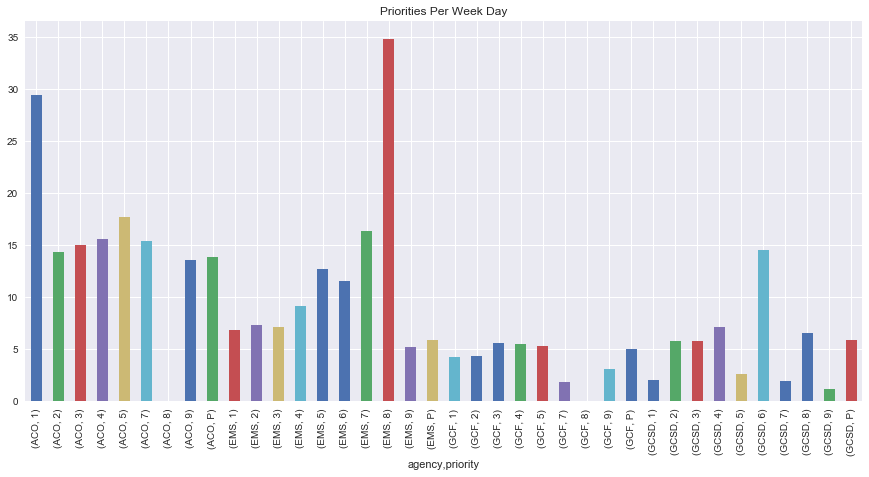

In [192]:
 ax =minutesUntilArrival.plot(kind='bar', title = "Priorities Per Week Day", figsize=(15,7))

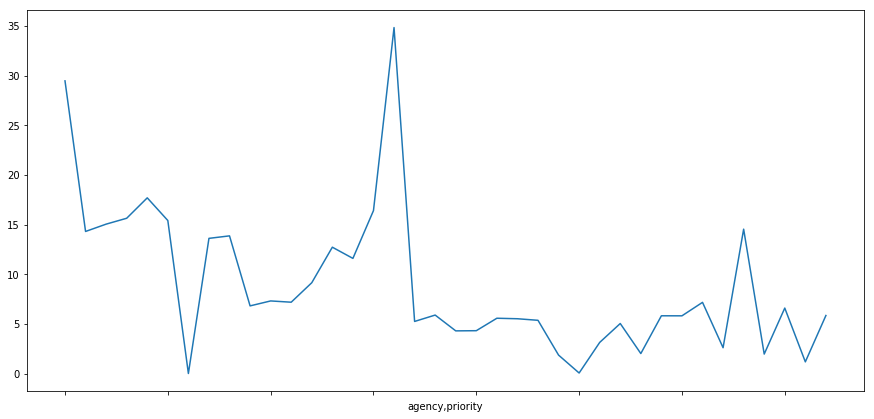

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
minutesUntilArrival.plot(ax=ax)

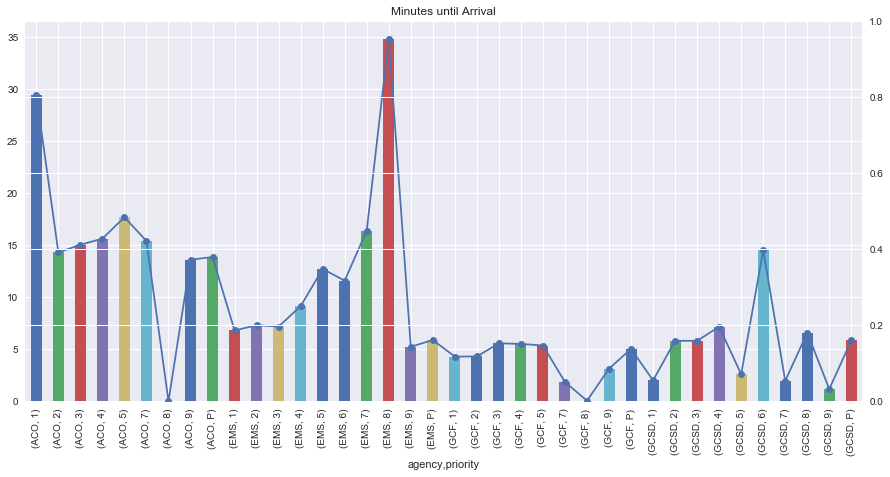

In [185]:
 ax =minutesUntilArrival.plot(kind='bar', title = "Minutes until Arrival", figsize=(15,7))
 ax2 = ax.twinx()
ax.plot(ax.get_xticks(),minutesUntilArrival, marker='o')

## Priority for Days of the Week 

In [29]:
calls.groupby('priority').dayOfWeek.mean()

priority
1    4.170647
2    4.045707
3    4.067818
4    4.039035
5    4.205214
6    4.411765
7    4.003201
8    3.966436
9    4.098539
P    4.041316
Name: dayOfWeek, dtype: float64

In [30]:
weekDay =calls.groupby(['dayOfWeek','priority']).size()

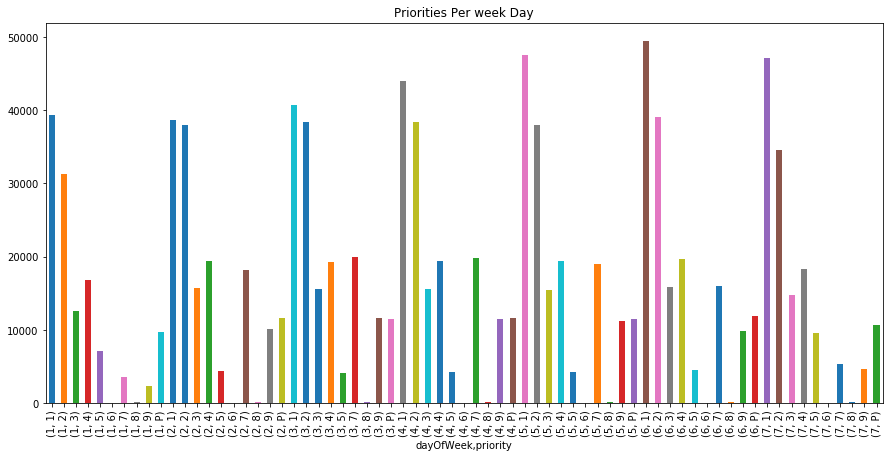

In [31]:
weekDay.plot(kind='bar', title = "Priorities Per week Day", figsize=(15,7))

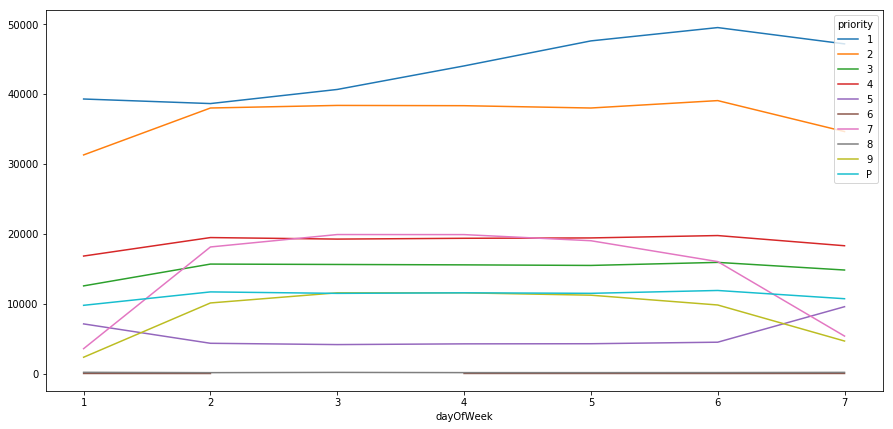

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
weekDay.unstack().plot(ax=ax)

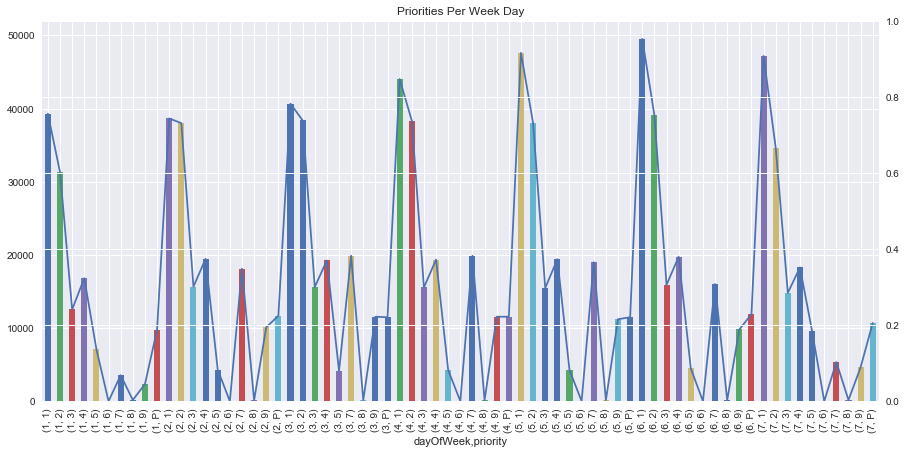

In [187]:
ax =weekDay.plot(kind='bar', title = "Priorities Per Week Day", figsize=(15,7))
ax2 = ax.twinx()
ax.plot(ax.get_xticks(),weekDay)

In [33]:
monthes = calls.groupby(['month','priority']).size()

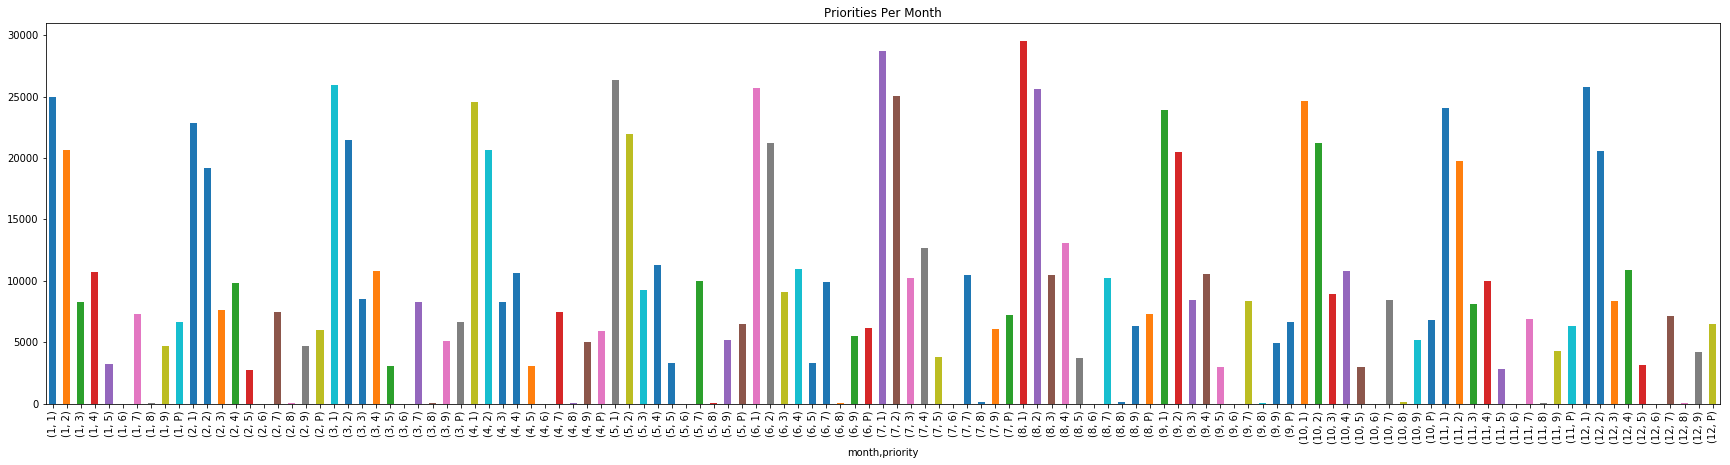

In [34]:
monthes.plot(kind='bar', title = "Priorities Per Month", figsize=(30,7))

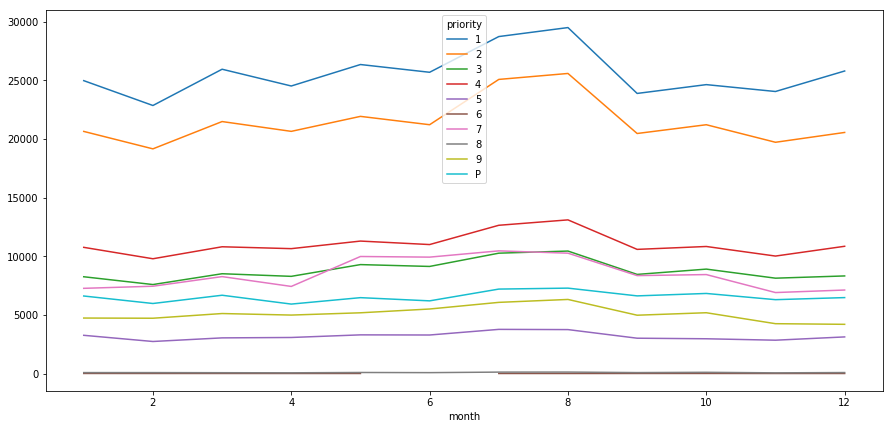

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
monthes.unstack().plot(ax=ax)

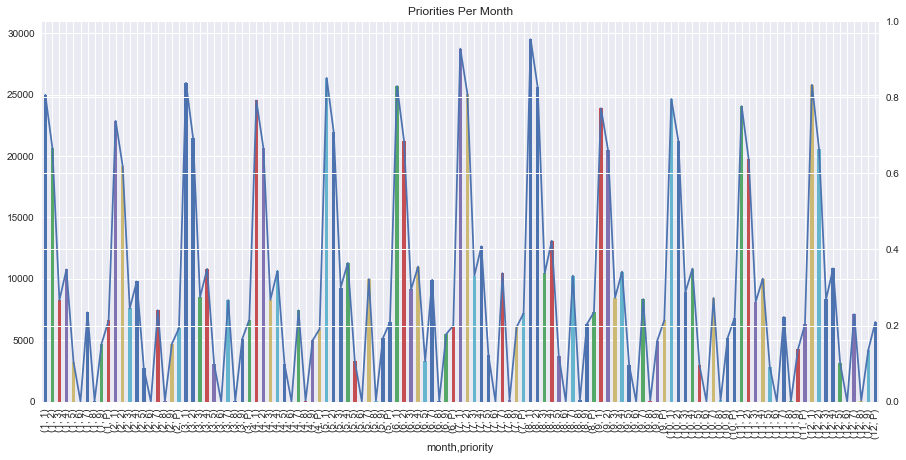

In [188]:
ax =monthes.plot(kind='bar', title = "Priorities Per Month", figsize=(15,7))
ax2 = ax.twinx()
ax.plot(ax.get_xticks(),monthes)

In [36]:
year =calls.groupby(['year','priority']).size()
year

year  priority
2012  1           22354
      2           22341
      3            7424
      4            9443
      5            2778
      6               1
      7            2055
      8              77
      9            4670
      P            6267
2013  1           50424
      2           40039
      3           16511
      4           19216
      5            5966
      6               3
      7           15787
      8             150
      9           10208
      P           12896
2014  1           48565
      2           39214
      3           17880
      4           20225
      5            5752
      6               4
      7           20480
      8             143
      9           10136
      P           12616
                  ...  
2016  1           50640
      2           42374
      3           17037
      4           21855
      5            6116
      6               7
      7           16545
      8             156
      9            9036
      P           13428
2

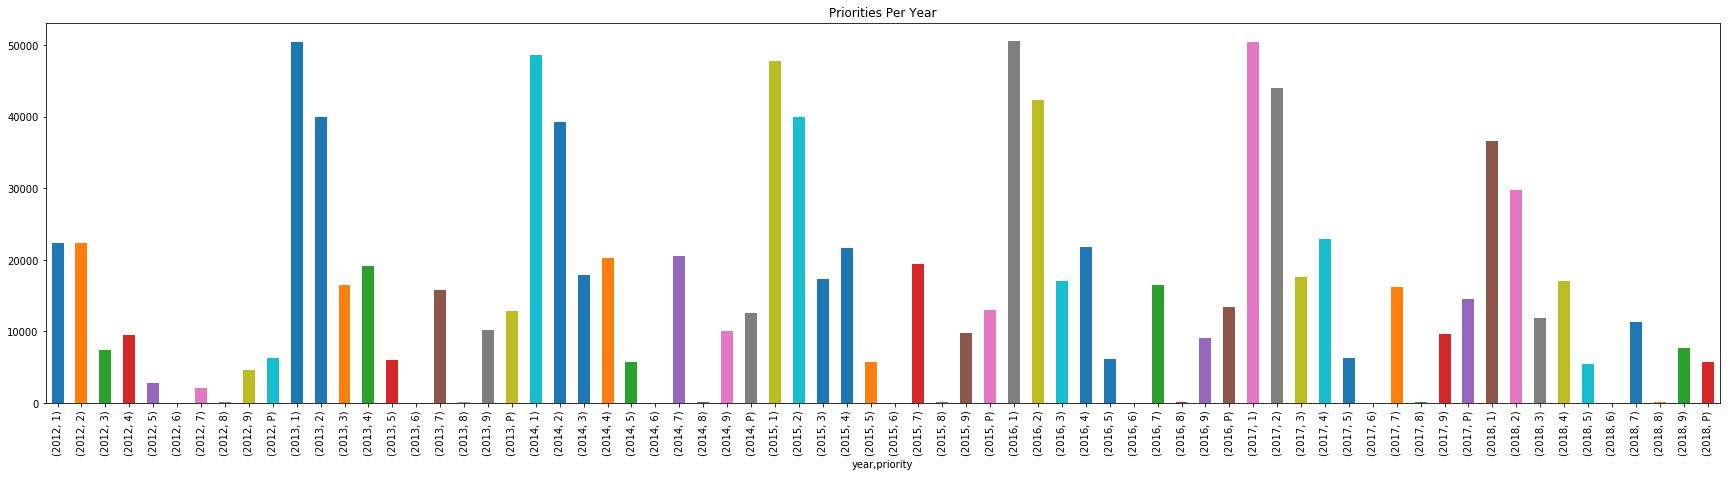

In [37]:
year.plot(kind = 'bar', title = "Priorities Per Year", figsize=(30,7))

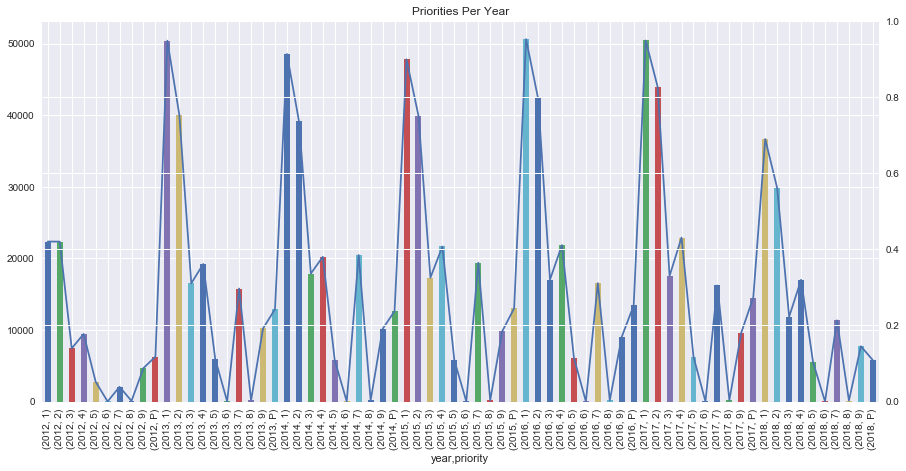

In [189]:
ax =year.plot(kind='bar', title = "Priorities Per Year", figsize=(15,7))
ax2 = ax.twinx()
ax.plot(ax.get_xticks(),year)

Looks like an even spread between the Monthes and Days because of the means
You could argue that the end of the weeks are more likely to see calls because the value isnt 3.5.

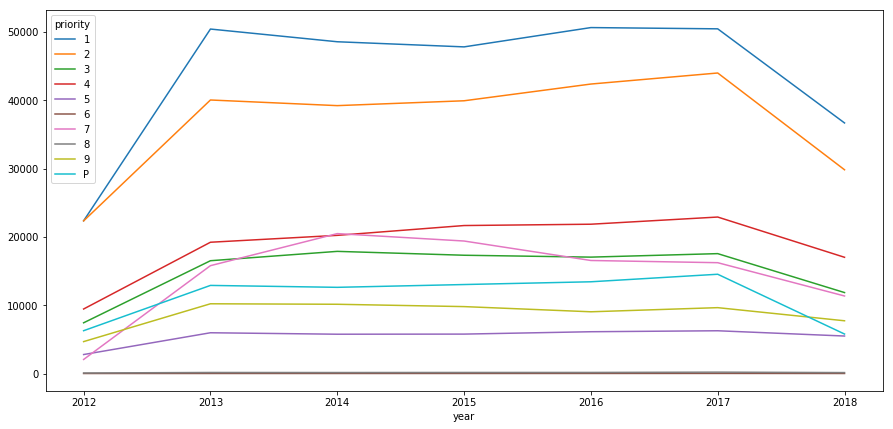

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
calls.groupby(['year','priority']).size().unstack().plot(ax=ax)

In [39]:
#didnt work have to work on this function..
def sortAndGroup(priorityNumber= []):
    for x in priorityNumber:
        priorityNumber = EMS[EMS.priority ==priorityNumber]
        priorityNumber = priorityNumber.groupby(['nature']).size().reset_index(name='count')
        priorityNumber = priorityNumber.sort_values(by='count', ascending=False)

# Priorities for Agencies 

In [40]:
agencyPriority = calls.groupby(['agency','priority']).size()
agencyPriority

agency  priority
ACO     1               12
        2                4
        3            12289
        4                4
        5                1
        7             8382
        8                1
        9            41696
        P            16966
EMS     1           143303
        2            94633
        3            66239
        4           128822
        5            34268
        6               19
        7             1413
        8                4
        9               58
        P             7109
GCF     1             8301
        2             6537
        3             5795
        4             2373
        5             2607
        7             3386
        8                1
        9              163
        P            52067
GCSD    1           155315
        2           156534
        3            21239
        4             1119
        5             1250
        6               15
        7            88651
        8             1007
        9  

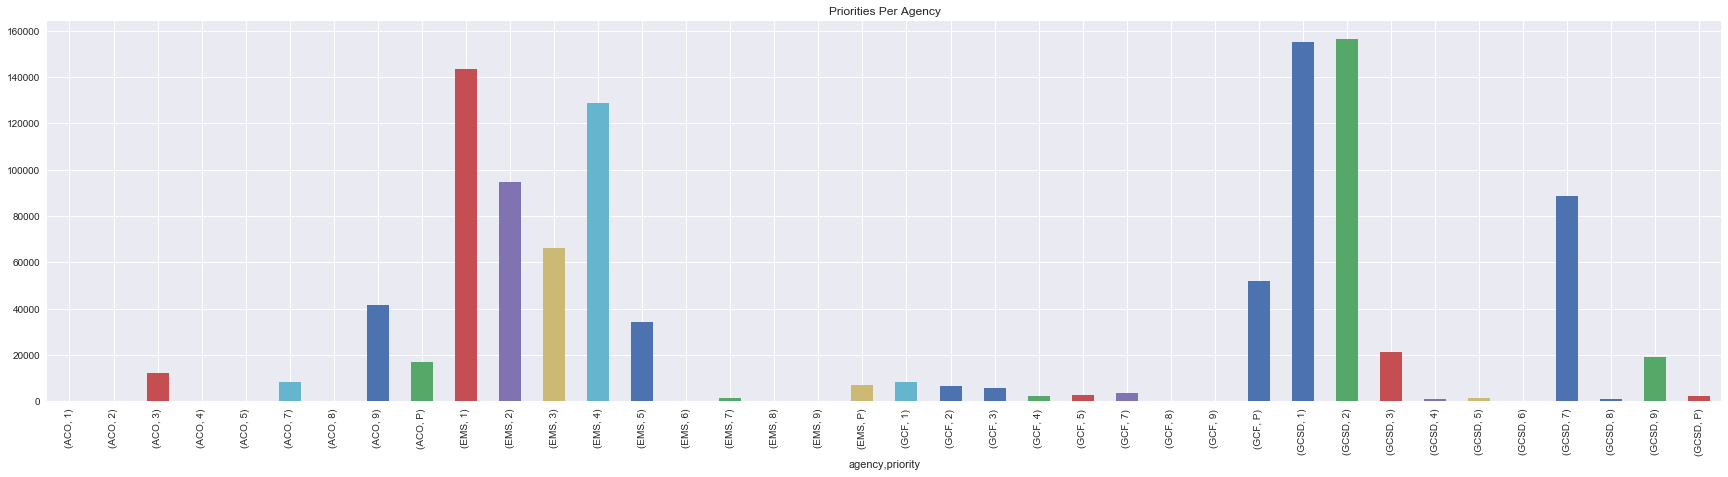

In [133]:
agencyPriority.plot(kind = 'bar', title = "Priorities Per Agency", figsize=(30,7))

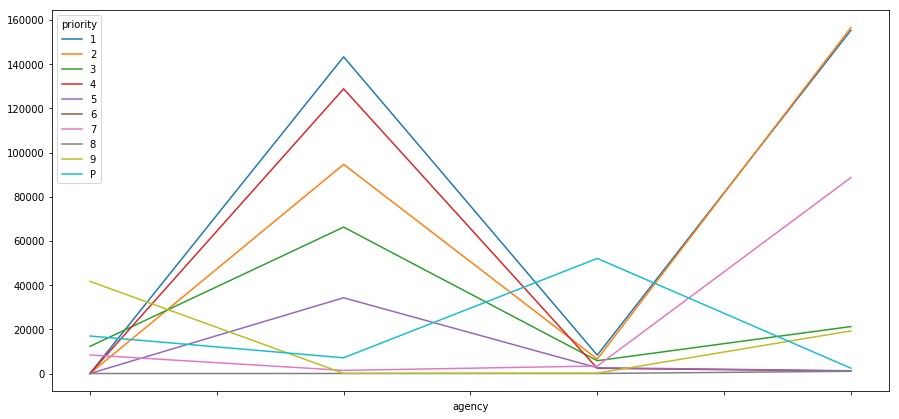

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
agencyPriority.unstack().plot(ax=ax)

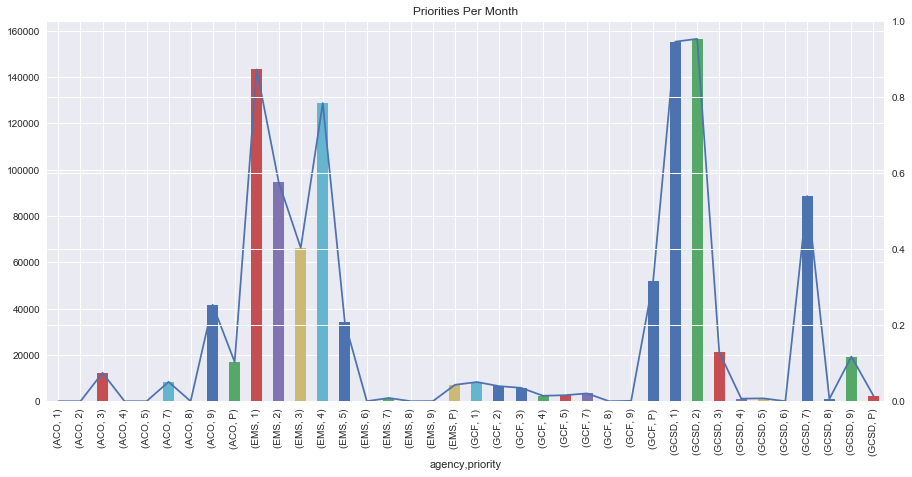

In [190]:
ax =agencyPriority.plot(kind='bar', title = "Priorities Per Month", figsize=(15,7))
ax2 = ax.twinx()
ax.plot(ax.get_xticks(),agencyPriority)

## 3) Start working on the overlap by year see what values have changed there priorities over the years


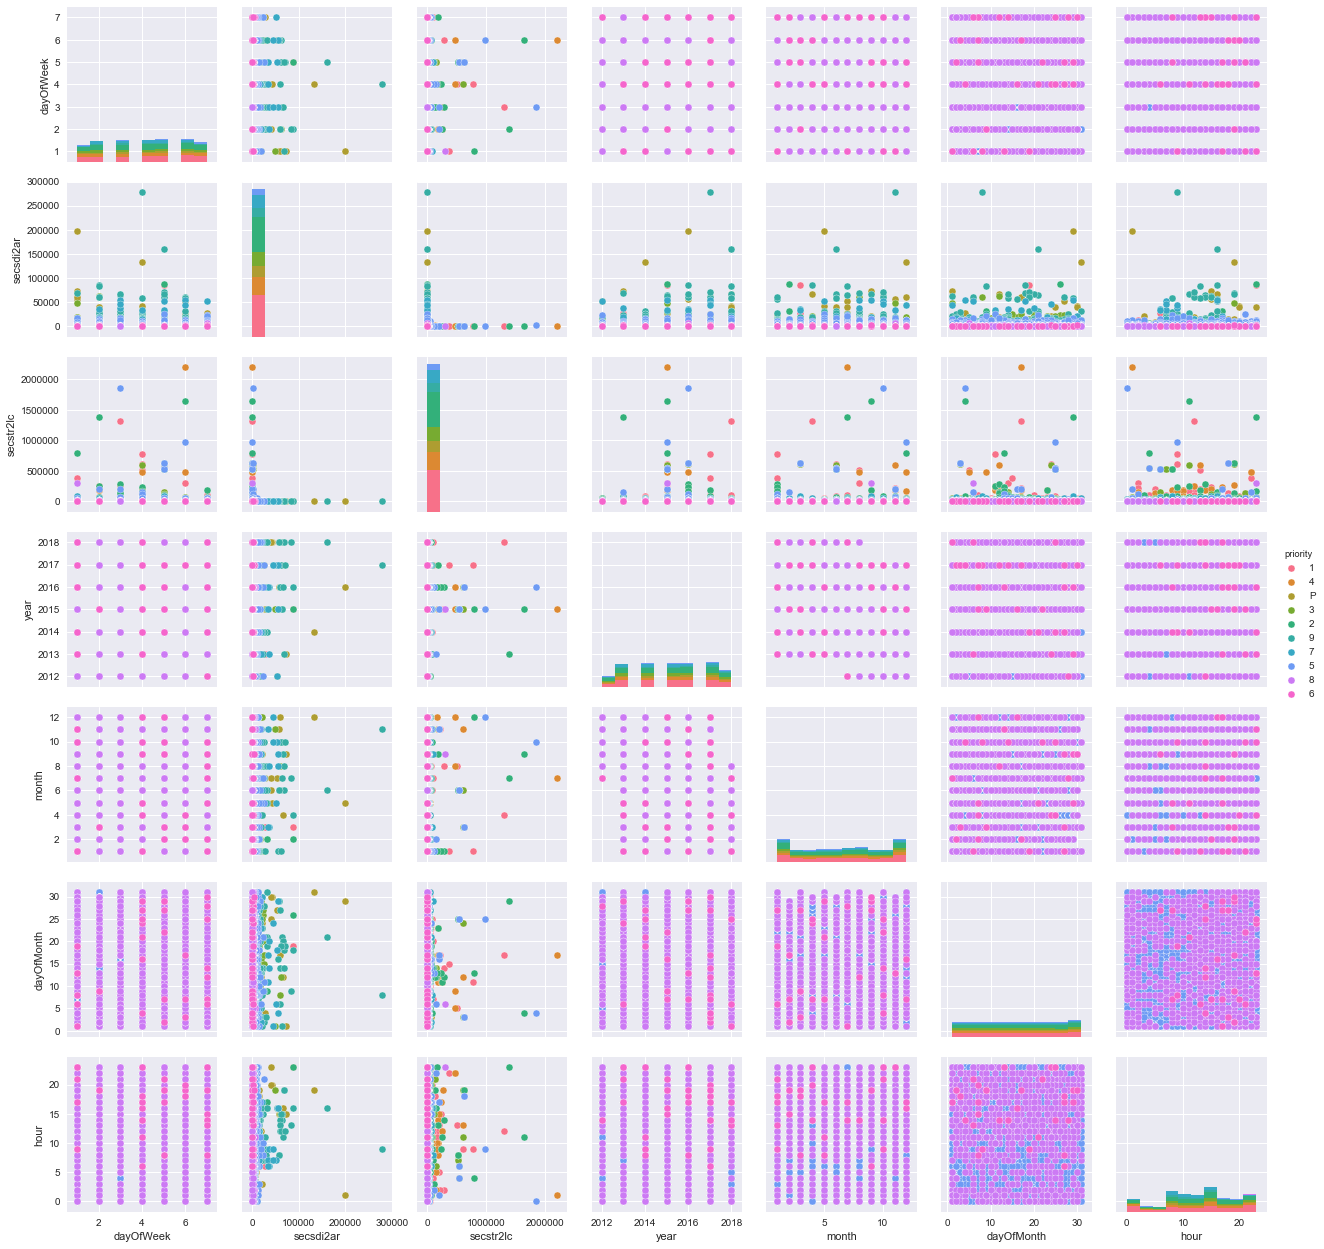

In [113]:
#for fun
sns.pairplot(calls,hue='priority');

In [63]:
#find intersections between priorities
#first split the Agencies
dataEMS= calls[calls['agency'] == 'EMS']
dataGCSD= calls[calls['agency'] == 'GCSD']
dataGCF= calls[calls['agency'] == 'GCF']
dataACO= calls[calls['agency'] == 'ACO']

In [93]:
#going to focus on the EMS data 
dataEMS

,callsource,city,priority,service,agency,district,dayOfWeek,secsdi2ar,secstr2lc,firstdisp,year,month,dayOfMonth,hour,actualnature
1,E911,G,4,EMS,EMS,B6,1,393,965,M261,2012,7,1,0,HEMORRHAGE / LACERATIONS
3,E911,W,1,EMS,EMS,B5,1,854,3918,M2,2012,7,1,0,SEIZURES-CONVULSIONS
5,E911,G,3,EMS,EMS,B4B,1,0,0,M241,2012,7,1,0,FALLS-BACK INJURIES(TRAUMATIC)
6,E911,G,4,EMS,EMS,B1,1,224,1267,M211,2012,7,1,0,SICK PERSON
8,W911,H,1,EMS,EMS,B2,1,277,1323,M221,2012,7,1,0,CHEST PAIN
11,E911,G,1,EMS,EMS,B6,1,604,0,MA32,2012,7,1,0,BREATHING PROBLEMS
12,E911,G,4,EMS,EMS,B6,1,210,1585,MA32,2012,7,1,0,SICK PERSON
19,E911,G,1,EMS,EMS,B3A,1,473,2624,M251,2012,7,1,1,HEART PROBLEMS
20,PHONE,G,5,EMS,EMS,B4A,1,0,1862,MA32,2012,7,1,1,CONVALESCENT TRANSPORT
22,E911,G,3,EMS,EMS,B1,1,646,1128,M211,2012,7,1,1,ASSAULT / RAPE


In [131]:
#split each year up
dataEMS13 =dataEMS[(dataEMS['year'] == 2013)]
dataEMS14 =dataEMS[(dataEMS['year']== 2014)]
dataEMS15 =dataEMS[dataEMS['year']== 2015]
dataEMS16 =dataEMS[dataEMS['year']== 2016]
dataEMS17 =dataEMS[dataEMS['year']== 2017]

In [191]:
#check to see what the data looks like
dataEMS13.shape


(71636, 15)

In [176]:
#Get each year of a data split up with out giving me the columns that I want currently
nature13 = dataEMS13.groupby(['year', 'actualnature', 'priority']).size().reset_index(name='count')
nature14 = dataEMS14.groupby(['year', 'actualnature', 'priority']).size().reset_index(name='count')
nature15 = dataEMS15.groupby(['year', 'actualnature','priority']).size().reset_index(name='count')
nature16 = dataEMS16.groupby(['year', 'actualnature','priority']).size().reset_index(name='count')
nature17 = dataEMS17.groupby(['year', 'actualnature','priority']).size().reset_index(name='count')

In [177]:
# get the top 100 Natures per year
nature13 = nature13.sort_values(by = 'count',ascending = False).head(100)
nature14 = nature14.sort_values(by = 'count',ascending = False).head(100)
nature15 = nature15.sort_values(by = 'count',ascending = False).head(100)
nature16 = nature16.sort_values(by = 'count',ascending = False).head(100)
nature17 = nature17.sort_values(by = 'count',ascending = False).head(100)


In [178]:
#sort them by the priorities
nature13 = nature13.sort_values(by = 'priority',ascending = False)
nature14 = nature14.sort_values(by = 'priority',ascending = False)
nature15 = nature15.sort_values(by = 'priority',ascending = False)
nature16 = nature16.sort_values(by = 'priority',ascending = False)
nature17 = nature17.sort_values(by = 'priority',ascending = False)

In [179]:
nature13 

,year,actualnature,priority,count
30,2013,ALLERGIES-HIVES-STINGS,P,22
58,2013,CARDIAC / RESPIRATORY ARREST,P,526
46,2013,BREATHING PROBLEMS,P,264
66,2013,CHOKING,P,32
178,2013,UNCONSCIOUS-FAINTING,P,167
9,2013,ACCIDENT HIT AND RUN PROP DAM,P,50
77,2013,DEAD BODY TRANSPORT-PTAR ONLY,7,176
137,2013,OVERDOSE-INGESTION-POISONING,5,46
72,2013,CONVALESCENT TRANSPORT,5,5209
154,2013,SICK PERSON,5,152


In [201]:
priority1 = nature13[nature13['priority']=='1']
priority2 = nature13[nature13['priority']=='2']
priority3 = nature13[nature13['priority']=='3']
priority4 = nature13[nature13['priority']=='4']
priority5 = nature13[nature13['priority']=='5']
priority6 = nature13[nature13['priority']=='6']
priority7 = nature13[nature13['priority']=='7']
priority8 = nature13[nature13['priority']=='8']
priority9 = nature13[nature13['priority']=='9']
priorityp = nature13[nature13['priority']=='p']

In [202]:
set(priority1.actualnature).intersection(set(priority2.actualnature))

{'ABDOMINAL PAIN / PROBLEMS',
 'ALLERGIES-HIVES-STINGS',
 'BREATHING PROBLEMS',
 'CHEST PAIN',
 'DIABETIC PROBLEMS',
 'FALLS-BACK INJURIES(TRAUMATIC)',
 'HEART PROBLEMS',
 'HEMORRHAGE / LACERATIONS',
 'OVERDOSE-INGESTION-POISONING',
 'PREGNANCY-CHILDBIRTH-MISCARRY',
 'SEIZURES-CONVULSIONS',
 'SICK PERSON',
 'UNCONSCIOUS-FAINTING'}

In [203]:
set(priority1.actualnature).intersection(set(priority3.actualnature))

{'ACCIDENT WITH PERSONAL INJURY',
 'ALLERGIES-HIVES-STINGS',
 'ANIMAL BITES / ATTACKS',
 'ASSAULT / RAPE',
 'CARDIAC / RESPIRATORY ARREST',
 'FALLS-BACK INJURIES(TRAUMATIC)',
 'HEMORRHAGE / LACERATIONS',
 'OVERDOSE-INGESTION-POISONING',
 'PREGNANCY-CHILDBIRTH-MISCARRY',
 'PSYCH/ABNORMAL BEHAV/SUIC ATT',
 'SEIZURES-CONVULSIONS',
 'SICK PERSON',
 'STAB / GUNSHOT WOUND',
 'TRAUMATIC INJURIES - SPECIFIC',
 'UNKNOWN PROBLEM MAN DOWN'}

In [204]:
set(priority1.actualnature).intersection(set(priority4.actualnature))

{'ABDOMINAL PAIN / PROBLEMS',
 'ACCIDENT WITH PERSONAL INJURY',
 'ALLERGIES-HIVES-STINGS',
 'ANIMAL BITES / ATTACKS',
 'ASSAULT / RAPE',
 'CHEST PAIN',
 'CHOKING',
 'DIABETIC PROBLEMS',
 'FALLS-BACK INJURIES(TRAUMATIC)',
 'HEART PROBLEMS',
 'HEMORRHAGE / LACERATIONS',
 'PREGNANCY-CHILDBIRTH-MISCARRY',
 'PSYCH/ABNORMAL BEHAV/SUIC ATT',
 'SEIZURES-CONVULSIONS',
 'SICK PERSON',
 'TRAUMATIC INJURIES - SPECIFIC',
 'UNCONSCIOUS-FAINTING'}

In [205]:
set(priority1.actualnature).intersection(set(priority5.actualnature))

{'ACCIDENT WITH PERSONAL INJURY',
 'OVERDOSE-INGESTION-POISONING',
 'SICK PERSON'}

In [206]:
set(priority1.actualnature).intersection(set(priority6.actualnature))

set()

In [207]:
set(priority1.actualnature).intersection(set(priority7.actualnature))

set()

In [208]:
set(priority1.actualnature).intersection(set(priority8.actualnature))

set()

In [209]:
set(priority1.actualnature).intersection(set(priority9.actualnature))

set()

In [210]:
set(priority1.actualnature).intersection(set(priorityp.actualnature))

set()

### This shows us that the idea that the priorities being solely based on the nature is FALSE. If there are overlaping in priorities with in the first year it would be very difficult to find a way to show how priorities have changed through out the years. I understand why they would overlap after looking at the natures that did overlap. We assumed they would have simular titles. We just didnt assume they would have them same titles. I understand it priority would be based on the nature and the severity of nature.